<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%206/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Analyzing Where Do People Drink?

Estimated time needed: **30** minutes

## Objectives

After completing this lab you will be able to:

*   Be confident about your data analysis skills


This dataset is from the story: <a href=https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01>  Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits? </a>  The dataset contains average serving sizes per person such as average wine, spirit, beer servings, as well as several other metrics. You will be asked to analyze the data and predict the total liters served given the servings. At the end of the lab, you will be instructed on how you can share your notebook.


You will need the following libraries:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl



<b>Importing the Data</b>


Load the csv:


In [2]:
df= pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%206/drinks.csv')


We use the method  <code>head()</code>  to display the first 5 columns of the dataframe:


In [46]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [56]:
#checking for missing values
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print (column)
    print(missing_data[column].value_counts())
#none found safe to proceed

country
False    193
Name: country, dtype: int64
beer_servings
False    193
Name: beer_servings, dtype: int64
spirit_servings
False    193
Name: spirit_servings, dtype: int64
wine_servings
False    193
Name: wine_servings, dtype: int64
total_litres_of_pure_alcohol
False    193
Name: total_litres_of_pure_alcohol, dtype: int64
continent
False    193
Name: continent, dtype: int64


<b>Question 1</b>:  Display the data types of each column using the attribute `dtype`.


In [97]:
df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

<b>Question 2</b> Use the method <code>groupby</code> to get the number of wine servings per continent:


In [201]:
df_grp=df.groupby(["continent"], as_index=False)
df_grp[["wine_servings"]].mean()


,continent,wine_servings
0,Africa,16.264151
1,Asia,9.068182
2,Europe,142.222222
3,North America,24.521739
4,Oceania,35.625000
5,South America,62.416667


<b>Question 3:</b> Perform a statistical summary and analysis of beer servings for each continent:


In [196]:
df_grp1=df.groupby(["continent"], as_index=True)
df_grp1['beer_servings'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,53.0,61.471698,80.557816,0.0,15.00,32.0,76.00,376.0
Asia,44.0,37.045455,49.469725,0.0,4.25,17.5,60.50,247.0
Europe,45.0,193.777778,99.631569,0.0,127.00,219.0,270.00,361.0
North America,23.0,145.434783,79.621163,1.0,80.00,143.0,198.00,285.0
Oceania,16.0,89.687500,96.641412,0.0,21.00,52.5,125.75,306.0
South America,12.0,175.083333,65.242845,93.0,129.50,162.5,198.00,333.0


<b>Question 4:</b> Use the function boxplot in the seaborn library to produce a plot that can be used to show the number of beer servings on each continent.


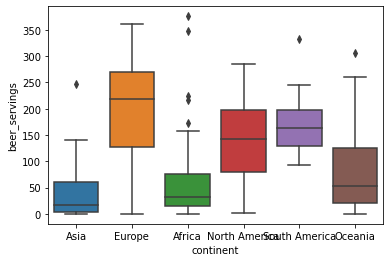

In [90]:
import seaborn as sns
sns.boxplot(x='continent', y="beer_servings", data=df)

<b>Question 5</b>: Use the function <code> regplot</code> in the seaborn library to determine if the number of wine servings is
negatively or positively correlated with the number of beer servings.


,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


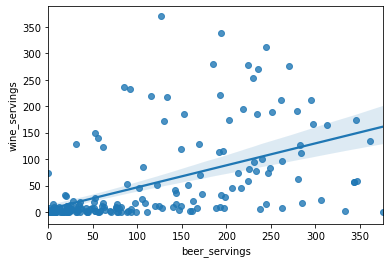

In [101]:
import seaborn as sns 
sns.regplot(x='beer_servings', y='wine_servings', data=df)
#it is positively correlated
#verify it is positive correlation
df[['beer_servings','wine_servings']].corr()


In [204]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
X=df[['wine_servings']]
Y=df[['total_litres_of_pure_alcohol']]
lm.fit(X,Y)
Yhat=lm.predict(X)
print('The R-square is: ', lm.score(X, Y))


      #BELOW THIS IS ADDTIONAL, IT PRINTS FIRST FIVE PREDICTIONS
for i in range(0,5):
    print('For', X.iloc[i] ,'the predicted value is: ',Yhat[i] )
    print(i)



The R-square is:  0.4456875459787605
For wine_servings    0
Name: 0, dtype: int64 the predicted value is:  [3.15407943]
0
For wine_servings    54
Name: 1, dtype: int64 the predicted value is:  [4.86088833]
1
For wine_servings    14
Name: 2, dtype: int64 the predicted value is:  [3.59658545]
2
For wine_servings    312
Name: 3, dtype: int64 the predicted value is:  [13.01564196]
3
For wine_servings    45
Name: 4, dtype: int64 the predicted value is:  [4.57642018]
4


<br>
<b>Note:</b> Please use <code>test_size = 0.10</code> and <code>random_state = 0</code> in the following questions.


<b>Question 7: </b>Use list of features to predict the <code>'total_litres_of_pure_alcohol'</code>, split the data into training and testing and determine the $R^2$ on the test data by using the provided code:


In [171]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lmMLR=LinearRegression()

feature_list=['beer_servings','spirit_servings','wine_servings']
x_data=df[feature_list]
y_data=df['total_litres_of_pure_alcohol']

x_train, x_test, y_train, y_test=train_test_split(x_data,y_data,test_size=0.1, random_state=0)
print("number of test samples:",x_test.shape[0])
print("number of train samples:",x_train.shape[0])

lmMLR.fit(x_train,y_train)
print("score for test:",lmMLR.score(x_test, y_test))




number of test samples: 20
number of train samples: 173
score for test: 0.6990304512837944


<b>Question 8 :</b> Create a pipeline object that scales the data, performs a polynomial transform and fits a linear regression model. Fit the object using the training data in the question above, then calculate the R^2 using the test data. Take a screenshot of your code and the $R^{2}$. There are some hints in the notebook:


<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [205]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

Input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model', LinearRegression())]
pipe=Pipeline(Input)
pipe

x_train=x_train.astype(float)
y_train=y_train.astype(float)
x_test=x_test.astype(float)
y_test=y_test.astype(float)

pipe.fit(x_train,y_train)
ypipe_predic=pipe.predict(x_test)#not needed i just put it
print("R^2 for test data is" ,pipe.score(x_test, y_test))


R^2 for test data is 0.7076376133886035


<b>Question 9</b>: Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculating the $R^{2}$ using the test data. Take a screenshot of your code and the $R^{2}$.


In [210]:
from sklearn.linear_model import Ridge
alpha=0.1
RidgeModel=Ridge(alpha=alpha)
RidgeModel.fit(x_train,y_train)
print("R^2 for test data with Ridge  with alpha=",alpha, "is" ,RidgeModel.score(x_test, y_test))



R^2 for test data with Ridge  with alpha= 0.1 is 0.699030454901918


<b>Question 10</b>: Perform a 2nd order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data and setting the regularization parameter to 0.1. Calculate the $R^{2}$ utilizing the test data provided. Take a screenshot of your code and the $R^{2}$.


In [214]:
from sklearn.linear_model import Ridge

alpha=0.1
pr=PolynomialFeatures(degree=2)

x_train_pr=pr.fit_transform(x_train)
x_test_pr=pr.fit_transform(x_test)

RidgeModel2=Ridge(alpha=alpha)
RidgeModel2.fit(x_train_pr,y_train)
print("R^2 for test with Ridge  with alpha=",alpha, "is" ,RidgeModel2.score(x_test_pr, y_test))

R^2 for test with Ridge  with alpha= 0.1 is 0.7076376228095799


<a href="https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/share-notebooks.html/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01"> CLICK HERE</a> to see how to share your notebook


<b>Sources</b>


<a href=https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01> Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits?</a> by By Mona Chalabi. You can download the dataset <a href=https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01>here</a>.


### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Joseph Santarcangelo</a>

## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-08-27  | 2.0  | Lavanya  |  Moved lab to course repo in GitLab  |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
